In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-20 to 2019-07-08 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

113


,len,mean,std,shrp,drawdown
Symbols,,,,,
MBB,29,0.264636,0.232323,0.968280,0.325100
VMBS,29,0.260383,0.232538,0.949095,0.264901
IEF,29,0.532576,0.589757,0.835757,0.734425
TLH,29,0.716935,0.844488,0.801968,0.896451
SCHR,29,0.376483,0.446690,0.753992,0.545453
VGIT,29,0.374851,0.449209,0.746130,0.606155
GOVT,29,0.386476,0.465961,0.744255,0.560930
SPTL,29,0.913709,1.197766,0.729714,1.628163
IEI,29,0.331673,0.401919,0.726489,0.516982


evicted SHY 0.8932582291242415
evicted SCHP 0.8999440290386242
evicted VMBS 0.8668266637621533
evicted USMV 0.8762028773978449
retry backlogs ['FEX', 'DHS', 'JHML', 'QDF', 'SPHQ', 'SCHD', 'HDV', 'NOBL', 'RPG', 'VTI', 'VONE', 'SPYD', 'JKE', 'VONG', 'DGRW', 'SPTM', 'SDY', 'VIG', 'PKW', 'VONV', 'ONEQ', 'FTC', 'DLN', 'LRGF', 'SCHV', 'FTCS', 'VYM', 'SDOG', 'TILT', 'VV', 'FVD', 'MTUM', 'SPLG', 'SCHK', 'IPE', 'VTV', 'VOO', 'XLG', 'DGRO', 'SPYV', 'MGV', 'TLT', 'DSI', 'SCHX', 'VUG', 'FTA', 'GSLC', 'IYY', 'IVE', 'VGLT', 'SCHO', 'EDV', 'TLH', 'MGK', 'ITOT', 'SCHB', 'TIP', 'TDTT', 'SCHR', 'SPTS', 'VGIT', 'VTIP', 'FNDX', 'IUSV', 'IWD', 'RSP', 'SPY', 'IEI', 'VGSH', 'GOVT', 'SPLV', 'IVW', 'SPYG', 'IWV', 'PRF', 'IWB', 'OEF', 'IVV', 'MGC', 'VOOG', 'IWF', 'IWY', 'STIP', 'SCHG', 'IUSG', 'SUSA', 'CFO', 'JKD', 'QUAL', 'MBB', 'RDIV', 'DTN', 'FV', 'FPX', 'DIA', 'MOAT', 'IEF', 'VOOV', 'RPV', 'ADX', 'FDL', 'DVY', 'RWL', 'USA'] at 0.905 - 1.757
evicted MBB 0.8876731798600488
evicted IPE 0.813175549177714
evicte

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,0.785241,0.418410,-0.031093,0.533216,0.795294,1.052073,1.618702,1.781885,0.852756
TLH,29.0,0.716935,0.844488,-0.815692,0.000000,0.612320,1.121494,2.693552,0.801968,0.896451
CET,29.0,1.041316,1.741934,-2.372882,-0.231105,0.965853,2.235981,4.809933,0.575013,3.118643
VLUE,29.0,0.864385,2.276620,-3.985411,0.428585,1.427254,1.920661,4.888826,0.362249,6.135276


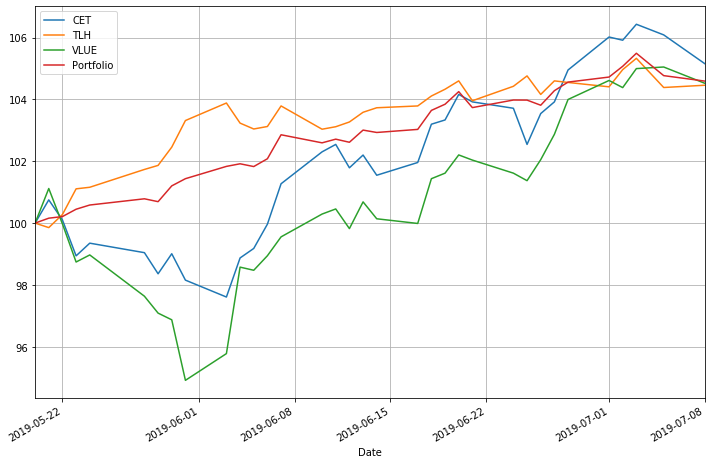

In [6]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.02)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

{'EDV': 0.572, 'MTUM': 0.428}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,1.145194,0.858852,-0.811565,0.838701,1.203835,1.697788,2.877449,1.287197,1.386591
EDV,29.0,1.183240,1.694293,-2.141637,0.063243,0.695521,1.625498,5.231127,0.674947,2.610604
MTUM,29.0,1.125644,2.108095,-2.116999,-0.467252,1.380126,2.244260,6.048635,0.515139,2.638699


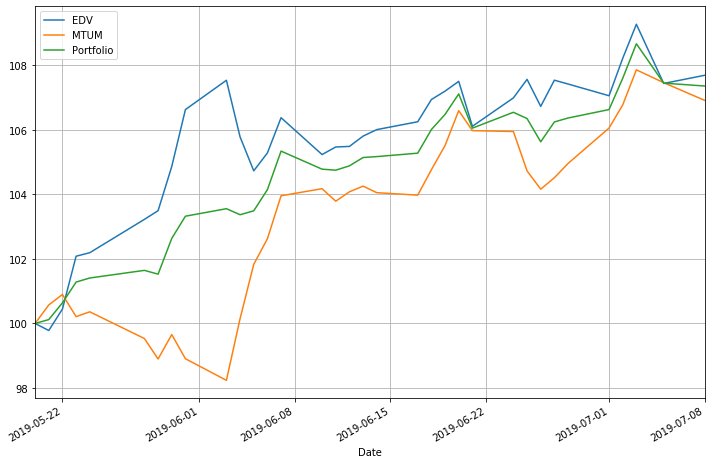

In [5]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)